## Mnist

In [105]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.utils.data

In [119]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

train_x=np.asarray(train.iloc[:, 1:])
train_y=np.asarray(train.iloc[:, 0])

test_x=np.array(test)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_x=torch.Tensor(train_x).to(device)
train_y=torch.Tensor(train_y).to(device)

test_x=torch.Tensor(test_x).to(device)
test_x=test_x.view(-1, 1, 28, 28)

In [178]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cnn1=nn.Conv2d(1, 16, 3, padding=1)
        self.relu1=nn.ReLU()
        self.cnn2=nn.Conv2d(16, 16, 3, padding=1)
        self.relu2=nn.ReLU()
        self.max_pool1=nn.MaxPool2d(2)
        
        self.cnn3=nn.Conv2d(16, 32, 3, padding=1)
        self.relu3=nn.ReLU()
        self.cnn4=nn.Conv2d(32, 32, 3, padding=1)
        self.relu4=nn.ReLU()
        self.max_pool2=nn.MaxPool2d(2)
        
        self.fc=nn.Linear(32*7*7, 10)
        #self.sm=nn.Softmax(dim=1)
        
        
    def forward(self, x):
        h=self.cnn1(x)
        h=self.relu1(h)
        h=self.cnn2(h)
        h=self.relu2(h)
        h=self.max_pool1(h)
        
        h=self.cnn3(h)
        h=self.relu3(h)
        h=self.cnn4(h)
        h=self.relu4(h)
        h=self.max_pool2(h)
        
        h=h.view(h.size(0), -1)
        h=self.fc(h)
        #h=self.sm(h)
        return h

In [125]:
train_tensor=torch.utils.data.TensorDataset(train_x, train_y)
train_loader=torch.utils.data.DataLoader(train_tensor, batch_size=50, shuffle=False)

In [143]:
model=CNN()
model.to(device)
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0001)

In [186]:
hist=[]
model.train()
for epoch in range(10):
    for i, (X, y) in enumerate(train_loader):
        X=X.view(-1, 1, 28, 28)
        pred=model(X)
        l=loss(pred, y.long())
        hist.append(l.item())
        
        l.backward()
        optimizer.step()
        
        optimizer.zero_grad()

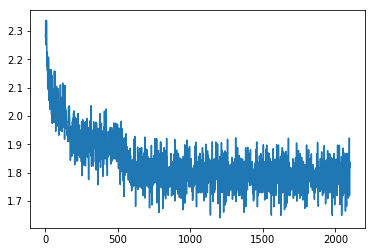

In [187]:
plt.plot(hist)
plt.show()

In [167]:
model.eval()
pred=model(test_x)

In [ ]:
pred=pred.argmax(1).cpu().numpy()

In [176]:
pred

array([2, 5, 4, ..., 3, 4, 2])

In [177]:
np.savetxt("pred_cnn_adam.csv", pred, delimiter=",")